In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!pip install requests

In [3]:
from bs4 import BeautifulSoup
import requests

In [82]:
url = 'https://www.nestle.in/nhw/nutrition-for-runners/good-reads/make-the-right-carb-choices-glycemic-index-versus-glycemic-load'
page = requests.get(url)

#page.text

soup = BeautifulSoup(page.text , 'html.parser')

#soup.table

table = soup.find_all('table')

#table

rows = table[2].find_all('tr')

#rows

heading = rows[0].find_all('td')

#heading

heading=[i.text for i in heading]

content = rows[1].find_all('p')

x=[i.text.replace('\n           ',',').split('  ') for i in content]

#for i in x[0]:
 #   print(i.split(','))
  #  break

name=[i.split(',')[j] for j in range(0,35) for i in x[0]]

del name[10]

del name[11]

del name[26]

del name[15]

del name[len(name)-1]

#name

GI=[i.split(',')[j] for j in range(0,30) for i in x[1]]

#GI

gram=[i.split(',')[j] for j in range(0,30) for i in x[2]]

#gram

gram[9]=gram[9][0:4]


gram[8]=gram[8][0:4]

GL=[i.split(',')[j] for j in range(0,30) for i in x[3]]

#GL

final=pd.DataFrame()

final['name']=name

final['GI']=GI

final['gram']=gram

final['GL']=GL

#final

final.drop([10],axis=0,inplace=True)

final.drop([5],axis=0,inplace=True)

final.reset_index(drop=True,inplace=True)

url2='https://www.glycemicindex.com/foodSearch.php?ak=list&food_name_search_type=cn&food_name=&gi_search_type=lte&gi=&gl_search_type=lte&gl=&country=India&product_category=&lop=OR&find=Find+Records&page=4'
page2 = requests.get(url2)

#page2.text

soup2 = BeautifulSoup(page2.text , 'html.parser')

#soup2.table

table2 = soup2.find_all('table')

#table2

rows2 = table2[12].find_all('tr')

#rows2

indian_list=[1,2,6,7,9]

for i in indian_list:

    content1=rows2[i].find_all('p')

    content1_filtered=[i.text.replace('\n           ',',').split('  ') for i in content1]

    del content1_filtered[3]

    content1_filtered

    row_temp=[i[0] for i in content1_filtered]

#row_temp=pd.Series(row_temp)

    df_temp = {'name':row_temp[0],'GI':row_temp[1],'gram':row_temp[2],'GL':row_temp[3]}

    final=final.append(df_temp,ignore_index=True)

In [83]:
final

,name,GI,gram,GL
0,Brown rice,50,150,16
1,White rice,89,150,43
2,Quinoa,53,150,13
3,Pearled barley,28,150,12
4,Puffed wheat,80,30,17
5,Oatmeal,71,30,9
6,Wholewheat bread,51,30,7
7,Wholegrain bread,41,250,5
8,Milk,32,250,4
9,Ice cream,39,120,6


In [133]:

val1,gram_u1=input().split(',')
val2,gram_u2=input().split(',')
val3,gram_u3=input().split(',')
val4,gram_u4=input().split(',')
val5,gram_u5=input().split(',')
#val='Apple'


weight1=int(final['gram'][final['name'].str.contains(val1)])
g1=int(final['GL'][final['name'].str.contains(val1)])

weight2=int(final['gram'][final['name'].str.contains(val2)])
g2=int(final['GL'][final['name'].str.contains(val2)])

weight3=int(final['gram'][final['name'].str.contains(val3)])
g3=int(final['GL'][final['name'].str.contains(val3)])

weight4=int(final['gram'][final['name'].str.contains(val4)])
g4=int(final['GL'][final['name'].str.contains(val4)])

weight5=int(final['gram'][final['name'].str.contains(val5)])
g5=int(final['GL'][final['name'].str.contains(val5)])

final_gl1=(int(gram_u1)*g1)/weight1
final_gl2=(int(gram_u2)*g2)/weight2
final_gl3=(int(gram_u3)*g3)/weight3
final_gl4=(int(gram_u4)*g4)/weight4
final_gl5=(int(gram_u5)*g5)/weight5

resu=final_gl1+final_gl2+final_gl3+final_gl4+final_gl5

print(val1,final_gl1)
print(val2,final_gl2)
print(val3,final_gl3)
print(val4,final_gl4)
print(val5,final_gl5)


print("TOTAL",resu)

Dosai,50
Milk,300
Idli,70
Dates,70
Apple,200
Dosai 7.333333333333333
Milk 4.8
Idli 8.68
Dates 6.416666666666667
Apple 26.666666666666668
TOTAL 53.89666666666667


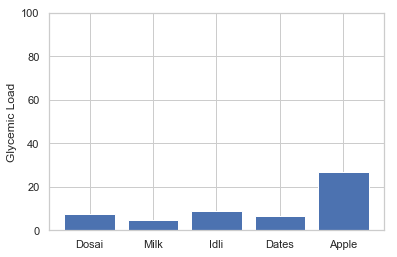

In [138]:
sns.set_style("whitegrid")
x1=[val1,val2,val3,val4,val5]
y1=[final_gl1,final_gl2,final_gl3,final_gl4,final_gl5]

plt.bar(x1,y1)
plt.yticks([0,20,40,60,80,100])
plt.ylabel('Glycemic Load')
x=plt.savefig(r'C:\Users\Ruul\Desktop\Diabetics_proj_pics\output.jpg')